# Proyek Analisis Data: brazilian ecommerce
- **Nama:** Haldies Gerhardien Pasya
- **Email:** haldiespasya@gmail.com
- **ID Dicoding:** haldies

## Menentukan Pertanyaan Bisnis

1. kategori Produk apa yang penjualan tertinggi dan terendah?
2. Bagaimana Performa Penjualan dan Omset Perusahaan dalam Beberapa Bulan Terakhir?
3. Bagaimana demografi pelanggan yang kita miliki?
4. Kapan terakhir pelanggan melakukan transaksi?
5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
6. Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

#### customers_dataset.csv

In [2]:
customers_df = pd.read_csv('data/customers_dataset.csv')
customers_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


#### orders_dataset.csv

In [3]:
orders_df = pd.read_csv('data/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### order_items_dataset.csv

In [4]:
order_items_df = pd.read_csv('data/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### products_dataset.csv

In [5]:
products_df = pd.read_csv('data/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


#### order_payments_dataset.csv

In [6]:
payments_df = pd.read_csv('data/order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


#### product_category_name_translation.csv

In [7]:
products_category_translation_df = pd.read_csv('data/product_category_name_translation.csv')
products_category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [8]:
# dataframes = {
#     'customers': customers_df,
#     'orders': orders_df,
#     'products': products_df,
#     'payments': payments_df,
#     'order_items': order_items_df,

# }

**Insight:**
- xxx
- xxx

### Assessing Data

#### customers_dataset.csv

In [9]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [11]:
customers_df.duplicated().sum()

np.int64(0)

In [12]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight:**
Missing values pada beberapa kolom:
order_approved_at: 160 missing values.
order_delivered_carrier_date: 1,783 missing values.
order_delivered_customer_date: 2,965 missing values.
Tipe data: Kolom timestamp (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date) perlu dikonversi menjadi tipe datetime agar lebih mudah diolah.

#### orders_dataset.csv

In [13]:
orders_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [14]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [15]:
orders_df.duplicated().sum()

np.int64(0)

In [16]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### order_items_dataset.csv

In [17]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [18]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [19]:
order_items_df.duplicated().sum()

np.int64(0)

In [20]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### order_payments_dataset.csv

In [21]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [23]:
payments_df.duplicated().sum()

np.int64(0)

In [24]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### products_dataset.csv

In [25]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [26]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [27]:
products_df.duplicated().sum()

np.int64(0)

In [28]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


insight :
## 1. Customers
- Tidak ada masalah yang perlu dibersihkan, karena tidak ada **missing values** atau **duplikasi**.
- ada	**customer_state yang tidak umum** dan  customer_city biasa menggunakan **capitalate**

## 2. Orders
- **Missing values** pada beberapa kolom:
  - `order_approved_at`: 160 missing values.
  - `order_delivered_carrier_date`: 1,783 missing values.
  - `order_delivered_customer_date`: 2,965 missing values.
- **Tipe data**: Kolom timestamp (`order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`) perlu dikonversi menjadi tipe `datetime` agar lebih mudah diolah.

## 3. Products
- **Missing values** pada beberapa kolom:
  - `product_category_name`, `product_name_lenght`, `product_description_lenght`, `product_photos_qty`: 610 missing values.
  - `product_weight_g`, `product_length_cm`, `product_height_cm`, `product_width_cm`: 2 missing values.
- **Tipe data**: Kolom `product_name_lenght`, `product_description_lenght`, dan `product_photos_qty` sebaiknya dicek kembali apakah tipe `float64` sesuai atau perlu dikonversi ke tipe lain.

## 4. Payments
- Tidak ada masalah yang perlu dibersihkan, karena tidak ada **missing values** atau **duplikasi**.


## 5. Categories
- Tidak ada masalah yang perlu dibersihkan, karena tidak ada **missing values** atau **duplikasi**.


### Cleaning Data

#### customers_dataset.csv

In [29]:
def capitalate_city(city):
    return city.title()

customers_df['customer_city'] = customers_df['customer_city'].apply(capitalate_city)

customers_df.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,SP


#### data dapat dari https://www.drupal.org/node/2559551 untuk mengubah customer_state

In [30]:
state_mapping = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AM': 'Amazonas',
    'AP': 'Amapá',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MG': 'Minas Gerais',
    'MS': 'Mato Grosso do Sul',
    'MT': 'Mato Grosso',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'PR': 'Paraná',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'RS': 'Rio Grande do Sul',
    'SC': 'Santa Catarina',
    'SE': 'Sergipe',
    'SP': 'São Paulo',
    'TO': 'Tocantins'
}

customers_df['customer_state'] = customers_df['customer_state'].map(state_mapping)
customers_df.head(2)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Franca,São Paulo
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Sao Bernardo Do Campo,São Paulo


#### Konversi Tipe Data dan Penanganan Nilai Hilang orders_dataset.csv

In [31]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_estimated_delivery_date'] = pd.to_datetime(orders_df['order_estimated_delivery_date'])


orders_df = orders_df[orders_df['order_approved_at'].notna()]


orders_df = orders_df[orders_df['order_delivered_customer_date'].notna()]
orders_df = orders_df[orders_df['order_delivered_carrier_date'].notna()]


In [32]:
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

In [33]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


#### Imputasi Nilai Hilang dan Konversi Tipe Data products_dataset.csv

In [34]:
products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean(), inplace=True)
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].mean(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].mean(), inplace=True)

products_df['product_weight_g'].fillna(products_df['product_weight_g'].mean(), inplace=True)
products_df['product_length_cm'].fillna(products_df['product_length_cm'].mean(), inplace=True)
products_df['product_height_cm'].fillna(products_df['product_height_cm'].mean(), inplace=True)
products_df['product_width_cm'].fillna(products_df['product_width_cm'].mean(), inplace=True)




C:\Users\haldies\AppData\Local\Temp\ipykernel_32220\528359164.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0], inplace=True)
C:\Users\haldies\AppData\Local\Temp\ipykernel_32220\528359164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

In [35]:
print(products_df.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [36]:
# Mengonversi kolom jika diperlukan
# Misalnya, jika product_name_lenght dan lainnya seharusnya menjadi integer, kita bisa melakukan
products_df['product_name_lenght'] = products_df['product_name_lenght'].astype(int)
products_df['product_description_lenght'] = products_df['product_description_lenght'].astype(int)
products_df['product_photos_qty'] = products_df['product_photos_qty'].astype(int)


In [37]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32951 non-null  int64  
 3   product_description_lenght  32951 non-null  int64  
 4   product_photos_qty          32951 non-null  int64  
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 2.3+ MB


#### membersihkan data dan mengganti nama kategori produk dari product_category_name ke product_category_name_english

In [38]:
# Menggabungkan DataFrame products_df dengan products_category_translation_df
products_df = pd.merge(
    products_df,
    products_category_translation_df[['product_category_name', 'product_category_name_english']],
    on='product_category_name',
    how='left'  # menggunakan left join agar semua produk tetap ada
)

# Mengganti nama kolom product_category_name dengan product_category_name_english
products_df['product_category_name'] = products_df['product_category_name_english']

# Menghapus kolom yang tidak diperlukan
products_df.drop(columns=['product_category_name_english'], inplace=True)

In [39]:
products_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
27401,fdd209e106931a894807cb3a076e8752,housewares,40,545,2,2100.0,48.0,25.0,25.0
29363,1347d4320dcd0acd750e37bb3d94a918,home_appliances,54,780,5,7600.0,30.0,50.0,40.0
16601,2eb705094d8383cfa50e8965dddc8a7e,books_general_interest,39,2244,1,1250.0,28.0,5.0,22.0
1817,ffb2e8c1ddc7c3e590d2bc4c91de53e1,furniture_decor,43,534,1,600.0,65.0,2.0,13.0
7557,24decea9d84c24b8c6c53a2df90066e9,bed_bath_table,46,352,2,550.0,50.0,11.0,11.0
3106,a916a0b56448758409cb1147fa3d1f8b,luggage_accessories,49,905,6,575.0,44.0,8.0,33.0
263,25cdef5b1428725aa16b8b9a6fbd72ca,industry_commerce_and_business,58,1058,1,1200.0,30.0,20.0,30.0
19495,6a9f754fa948a2f0304ee2b75f801da6,toys,38,436,1,550.0,28.0,6.0,15.0
13231,22914988306f1235a3e5fff32403d205,auto,41,1146,1,4000.0,65.0,25.0,25.0
1264,45f68d6b5c1bdaeb13882fdcb62e4e47,baby,57,1644,3,500.0,23.0,33.0,11.0


In [40]:
products_category_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## Exploratory Data Analysis (EDA)

### Menganalisis penjualan produk berdasarkan kategori.

In [41]:
merged_df = pd.merge(orders_df, order_items_df, on='order_id')
merged_df = pd.merge(merged_df, products_df, on='product_id')

merged_df.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,...,29.99,8.72,housewares,40,268,4,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumery,29,178,1,400.0,19.0,13.0,19.0


In [42]:
category_sales = merged_df.groupby('product_category_name')['order_id'].count().reset_index()
category_sales.columns = ['product_category_name', 'total_orders']
category_sales

,product_category_name,total_orders
0,agro_industry_and_commerce,206
1,air_conditioning,289
2,art,197
3,arts_and_craftmanship,24
4,audio,362
...,...,...
66,stationery,2466
67,tablets_printing_image,83
68,telephony,4428
69,toys,4030


In [43]:
category_sales_sorted = category_sales.sort_values(by='total_orders', ascending=False)
print(category_sales_sorted.head(10))

    product_category_name  total_orders
7          bed_bath_table         12488
43          health_beauty          9467
65         sports_leisure          8429
39        furniture_decor          8156
15  computers_accessories          7643
49             housewares          6795
70          watches_gifts          5857
68              telephony          4428
42           garden_tools          4267
5                    auto          4139


In [44]:
print(category_sales_sorted.tail(10))

                product_category_name  total_orders
41  furniture_mattress_and_upholstery            37
23                diapers_and_hygiene            37
35                            flowers            33
46                     home_comfort_2            30
32                      fashion_sport            29
3               arts_and_craftmanship            24
52                         la_cuisine            14
11                  cds_dvds_musicals            14
29          fashion_childrens_clothes             7
61              security_and_services             2


In [45]:
customers_df['customer_state'].value_counts()

customer_state
São Paulo              41746
Rio de Janeiro         12852
Minas Gerais           11635
Rio Grande do Sul       5466
Paraná                  5045
Santa Catarina          3637
Bahia                   3380
Distrito Federal        2140
Espírito Santo          2033
Goiás                   2020
Pernambuco              1652
Ceará                   1336
Pará                     975
Mato Grosso              907
Maranhão                 747
Mato Grosso do Sul       715
Paraíba                  536
Piauí                    495
Rio Grande do Norte      485
Alagoas                  413
Sergipe                  350
Tocantins                280
Rondônia                 253
Amazonas                 148
Acre                      81
Amapá                     68
Roraima                   46
Name: count, dtype: int64

In [46]:
customers_df['customer_city'].value_counts()

customer_city
Sao Paulo                15540
Rio De Janeiro            6882
Belo Horizonte            2773
Brasilia                  2131
Curitiba                  1521
                         ...  
Marques De Souza             1
General Maynard              1
Cerrito                      1
Mocajuba                     1
Governador Mangabeira        1
Name: count, Length: 4119, dtype: int64

### Analisis Kinerja Bulanan Penjualan dan Omset Perusahaan

In [47]:
merged_df = orders_df.merge(order_items_df, on='order_id').merge(payments_df, on='order_id')

print("Merged DataFrame:")
print(merged_df.head(), "\n")

merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['month_year'] = merged_df['order_purchase_timestamp'].dt.to_period('M')


print("DataFrame setelah konversi timestamp:")
print(merged_df[['order_purchase_timestamp', 'month_year']].head(), "\n")


monthly_performance = merged_df.groupby('month_year').agg(
    total_sales=('order_id', 'count'),  # Jumlah order
    total_revenue=('payment_value', 'sum')  # Total omset
).reset_index()

print("Monthly Performance:")
print(monthly_performance, "\n")

Merged DataFrame:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00      

insight :
1. Tren Penjualan dan Omset
* Peningkatan Penjualan: Dari data, terlihat bahwa jumlah total penjualan (total_sales) menunjukkan tren yang meningkat dari bulan ke bulan, terutama dari tahun 2017 hingga pertengahan 2018. Misalnya, penjualan meningkat signifikan dari 3.078 pada Maret 2017 menjadi 8.812 pada November 2017.
* Kenaikan Omset: Omset (total_revenue) juga menunjukkan peningkatan yang sejalan dengan peningkatan jumlah penjualan. Pada bulan yang sama, total_revenue menunjukkan pertumbuhan yang konsisten, mencerminkan bahwa penjualan tidak hanya meningkat dalam jumlah tetapi juga dalam nilai.


In [48]:

df_merged = orders_df.merge(customers_df, on='customer_id', how='left')


print("Statistik Deskriptif Pelanggan:")
print(df_merged[['customer_unique_id', 'customer_city', 'customer_state']].describe(include='all'))

Statistik Deskriptif Pelanggan:
                      customer_unique_id customer_city customer_state
count                              96461         96461          96461
unique                             93342          4085             27
top     8d50f5eadf50201ccdcedfb9e2ac8455     Sao Paulo      São Paulo
freq                                  15         15044          40489


**Kota Pelanggan:**

* Total Kota Berbeda: Ada 4.085 kota yang terwakili dalam data, menunjukkan jangkauan geografis yang luas.
* Kota Terpopuler: Kota yang paling banyak memiliki pelanggan adalah Sao Paulo dengan 15.044 entri. Ini menunjukkan bahwa Sao Paulo adalah pusat utama untuk basis pelanggan Anda, yang mungkin menarik untuk kegiatan pemasaran dan promosi.

**Provinsi Pelanggan:**

* Total Negara: Terdapat 27 Negara, dengan São Paulo sebagai provinsi yang paling banyak memiliki pelanggan (40.489 entri).
* Dominasi Negara: Dominasi São Paulo sebagai Negara dengan pelanggan terbanyak menunjukkan potensi besar untuk pertumbuhan di area ini, serta pentingnya mempertimbangkan strategi pemasaran yang ditargetkan di wilayah ini.

## Visualization & Explanatory Analysis

### 1: kategori Produk apa yang penjualan tertinggi dan terendah?

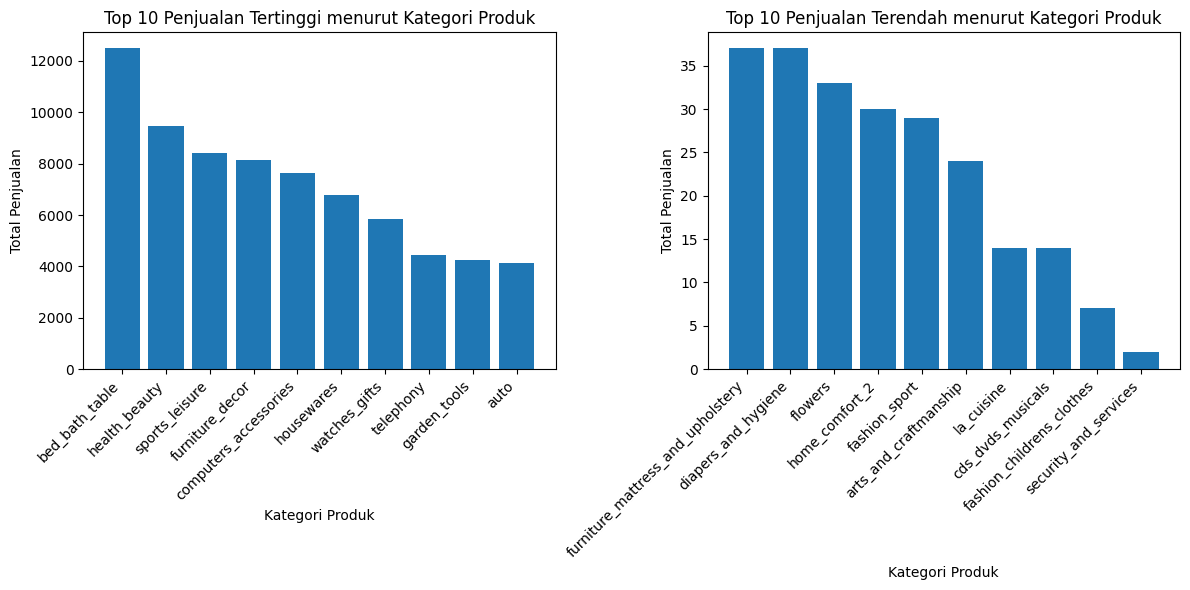

In [49]:

top_10_categories = category_sales_sorted.head(10)
bottom_10_categories = category_sales_sorted.tail(10)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(top_10_categories['product_category_name'], top_10_categories['total_orders'])
plt.title('Top 10 Penjualan Tertinggi menurut Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.subplot(1, 2, 2)
plt.bar(bottom_10_categories['product_category_name'], bottom_10_categories['total_orders'])
plt.title('Top 10 Penjualan Terendah menurut Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

--insight :
* **Kategori dengan penjualan tertinggi** adalah "bed_bath_table" (tempat tidur, kamar mandi, dan meja). Ini menunjukkan bahwa produk-produk rumah tangga seperti tempat tidur, perlengkapan kamar mandi, dan perabotan masih menjadi pilihan utama konsumen.
* **Kategori lainnya yang juga memiliki penjualan tinggi** adalah "health_beauty" (kesehatan dan kecantikan), "computers_accessories" (komputer dan aksesoris), serta "furniture_decor" (perabotan dan dekorasi). Ini menunjukkan bahwa konsumen juga sangat memperhatikan kesehatan, gaya hidup modern, dan keindahan rumah.




*   **Kategori dengan penjualan terendah adalah** "security_and_services" (keamanan dan layanan). Ini mungkin disebabkan oleh beberapa faktor, seperti persaingan yang ketat di sektor ini, atau kurangnya informasi yang jelas mengenai produk dan layanan yang ditawarkan.
* **Kategori lainnya dengan penjualan rendah** adalah "fashion_childrens_clothes" (pakaian anak-anak), "cds_dvds_music_instruments" (CD, DVD, dan instrumen musik), dan "home_comfort_2". Penurunan penjualan pada kategori-kategori ini mungkin terkait dengan pergeseran tren konsumsi menuju platform digital dan layanan streaming.



### 2. Bagaimana Performa Penjualan dan Omset Perusahaan dalam Beberapa Bulan Terakhir?

In [50]:
# Pastikan kolom order_purchase_timestamp dalam format datetime
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

# Tambahkan kolom purchase_month
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')


In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_orders.index.astype(str), y=monthly_orders.values, marker='o')

# Tambahkan grid
plt.grid(visible=True)

plt.title('Jumlah Order per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Order', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'monthly_orders' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
merged_df = pd.merge(orders_df[['order_id', 'order_purchase_timestamp']], payments_df[['order_id', 'payment_value']], on='order_id')

merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'])

merged_df['month_year'] = merged_df['order_purchase_timestamp'].dt.to_period('M')

omset_per_bulan = merged_df.groupby('month_year')['payment_value'].sum().reset_index()

omset_per_bulan['month_year'] = omset_per_bulan['month_year'].dt.to_timestamp()

def format_number(num):
    if num >= 1_000_000:
        return f"{num / 1_000_000:.1f} M"  # Juta
    elif num >= 1_000:
        return f"{num / 1_000:.1f} k"  # Ribu
    else:
        return str(num)

omset_per_bulan['formatted_month'] = omset_per_bulan['month_year'].dt.strftime('%B %Y')

plt.figure(figsize=(10, 6))
sns.lineplot(x='formatted_month', y='payment_value', data=omset_per_bulan, marker='o')


plt.title('Omset Perusahaan dalam Beberapa Bulan Terakhir', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Total Omset', fontsize=12)
plt.xticks(rotation=45)

for index, value in enumerate(omset_per_bulan['payment_value']):
    plt.text(index, value, format_number(value), ha='center', va='bottom')

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()

plt.show()


**Tren Penjualan:**

* Terlihat bahwa bulan Januari memiliki jumlah
penjualan tertinggi dengan 8,364 transaksi.
Februari menunjukkan penurunan penjualan ke 7,766, dan tren ini berlanjut ke bulan Juli dan Agustus yang juga menunjukkan penurunan, dengan penjualan terendah di bulan Juli (7,196).
Penjualan menunjukkan fluktuasi, dengan puncaknya di bulan Maret dan April.

**Tren Omset:**

* Omset tertinggi tercatat pada bulan Mei dengan 1,480,667.59, yang sejalan dengan tren penjualan yang tinggi pada bulan tersebut.
Bulan Agustus memiliki omset terendah di antara bulan yang dicatat, yaitu 1,211,240.09.
Meskipun penjualan menurun di bulan Juli dan Agustus, omset tetap mengalami penurunan yang signifikan pada bulan Agustus.

### Pertanyaan 3: Bagaimana demografi pelanggan yang kita miliki?

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

plt.figure(figsize=(10, 6))
state_counts = customers_df['customer_state'].value_counts().head(10)
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Distribusi Pelanggan Berdasarkan Negara Bagian', fontsize=16)
plt.xlabel('Negara Bagian', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
city_counts = customers_df['customer_city'].value_counts().head(10)
sns.barplot(x=city_counts.index, y=city_counts.values, palette='Blues_d')
plt.title('10 Kota dengan Pelanggan Terbanyak', fontsize=16)
plt.xlabel('Kota', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Analisis Demografi Pelanggan Berdasarkan 10 negara Teratas
* **Konsentrasi Pelanggan Tertinggi**: Sebagian besar pelanggan Anda terkonsentrasi di São Paulo. Ini menunjukkan bahwa pasar di São Paulo sangat responsif terhadap produk atau layanan yang Anda tawarkan.

* **Pasar Potensial Lainnya**: Selain São Paulo, beberapa negara bagian lain seperti Rio de Janeiro, Minas Gerais, dan Rio Grande do Sul juga memiliki jumlah pelanggan yang cukup signifikan. Ini mengindikasikan adanya potensi pasar yang cukup besar di wilayah-wilayah tersebut.
* **Perbedaan Jumlah Pelanggan yang Signifikan**: Terdapat perbedaan yang cukup signifikan antara jumlah pelanggan di São Paulo dengan negara bagian lainnya. Ini menunjukkan adanya ketimpangan distribusi pelanggan yang perlu diperhatikan.


Analisis Demografi Pelanggan Berdasarkan 10 Kota Teratas

* **Konsentrasi Pelanggan Tertinggi**: Sebagian besar pelanggan Anda terkonsentrasi di Sao Paulo. Ini menunjukkan bahwa pasar di Sao Paulo sangat responsif terhadap produk atau layanan yang Anda tawarkan.
* **Pasar Potensial Lainnya:** Selain Sao Paulo, beberapa kota besar lainnya seperti Rio de Janeiro, Belo Horizonte, dan Curitiba juga memiliki jumlah pelanggan yang cukup signifikan. Ini mengindikasikan adanya potensi pasar yang cukup besar di wilayah-wilayah tersebut.
* **Perbedaan Jumlah Pelanggan yang Signifikan:** Terdapat perbedaan yang cukup signifikan antara jumlah pelanggan di Sao Paulo dengan kota-kota lainnya. Ini menunjukkan adanya ketimpangan distribusi pelanggan yang perlu diperhatikan.

In [ ]:

df = pd.merge(orders_df, customers_df, on='customer_id')

df = pd.merge(df, payments_df[['order_id', 'payment_value']], on='order_id')

df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
latest_date = df['order_purchase_timestamp'].max()
df['recency'] = (latest_date - df['order_purchase_timestamp']).dt.days


frequency_df = df.groupby('customer_unique_id').agg({'order_id': 'nunique'}).reset_index()
frequency_df.columns = ['customer_unique_id', 'frequency']


monetary_df = df.groupby('customer_unique_id').agg({'payment_value': 'sum'}).reset_index()
monetary_df.columns = ['customer_unique_id', 'monetary']


rfm_df = df[['customer_unique_id', 'recency']]
rfm_df = rfm_df.merge(frequency_df, on='customer_unique_id')
rfm_df = rfm_df.merge(monetary_df, on='customer_unique_id')




### 4. Kapan terakhir pelanggan melakukan transaksi?

### 5. Seberapa sering seorang pelanggan melakukan pembelian dalam beberapa bulan terakhir?
### 6.Berapa banyak uang yang dihabiskan pelanggan dalam beberapa bulan terakhir?


In [ ]:
colors = ["#00FFFF", "#8A2BE2", "#7FFF00", "#FF7F50", "#DC143C"]
rfm_df['short_customer_id'] = rfm_df['customer_unique_id'].str[:5]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

sns.barplot(y="recency", x="short_customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="frequency", x="short_customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="short_customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


### Mengurutkan customer berdasarkan recency, frequency, & monetary score

In [ ]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()


In [ ]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

In [ ]:
rfm_df.describe()

In [ ]:

rfm_df.sort_values(by="recency", ascending=True).head(5)

In [ ]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_unique_id', 'RFM_score']].head(7)

### Segmentasi customer berdasarkan RFM_score

In [ ]:
import numpy as np # imports the numpy library and assigns it to the variable np

rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_unique_id', 'RFM_score', 'customer_segment']].head(20)

In [ ]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_unique_id.nunique()
customer_segment_df

In [ ]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

In [ ]:
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_unique_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

### pertanyaan 1

Dari analisis grafik di atas bahwa
* Produk rumah tangga masih menjadi primadona dan memiliki pangsa pasar yang besar.
* Produk yang berkaitan dengan gaya hidup modern seperti kesehatan, teknologi, dan dekorasi juga sangat diminati.
* Produk-produk tradisional seperti CD, DVD, dan pakaian anak-anak mengalami penurunan penjualan.
* Produk seperti keamanan dan layanan masih perlu upaya lebih untuk meningkatkan penjualan.